In [ ]:
!pip install ultralytics --quiet
!pip install supervision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import os
import random
import time
import numpy as np
import pandas as pd
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import xml.etree.ElementTree as ET
from IPython.display import display, Video


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
torch.cuda.empty_cache()

In [ ]:
!kaggle datasets download -d nicolaasregnier/pinotnoirgrapes

Dataset URL: https://www.kaggle.com/datasets/nicolaasregnier/pinotnoirgrapes
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
... resuming from 502267904 bytes (1198737276 bytes left) ...
100% 1.58G/1.58G [00:57<00:00, 22.1MB/s]
100% 1.58G/1.58G [00:57<00:00, 21.0MB/s]


In [ ]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('pinotnoirgrapes.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
train = os.listdir("/content/Grapes/Grapes/PinotNoir/train/images")
test = os.listdir("/content/Grapes/Grapes/PinotNoir/test/images")
val = os.listdir("/content/Grapes/Grapes/PinotNoir/val/images")

In [ ]:
train_dir = "/content/Grapes/Grapes/PinotNoir/train/images"
test_dir = "/content/Grapes/Grapes/PinotNoir/test/images"
val_dir = "/content/Grapes/Grapes/PinotNoir/val/images"

In [ ]:
image_path = os.path.join(val_dir, val[1])
with Image.open(image_path) as img:
    width, height = img.size
    print(f"Dimensions of {val[1]}: {width} x {height}")

Dimensions of IMG_0207_1.jpg: 1983 x 1280


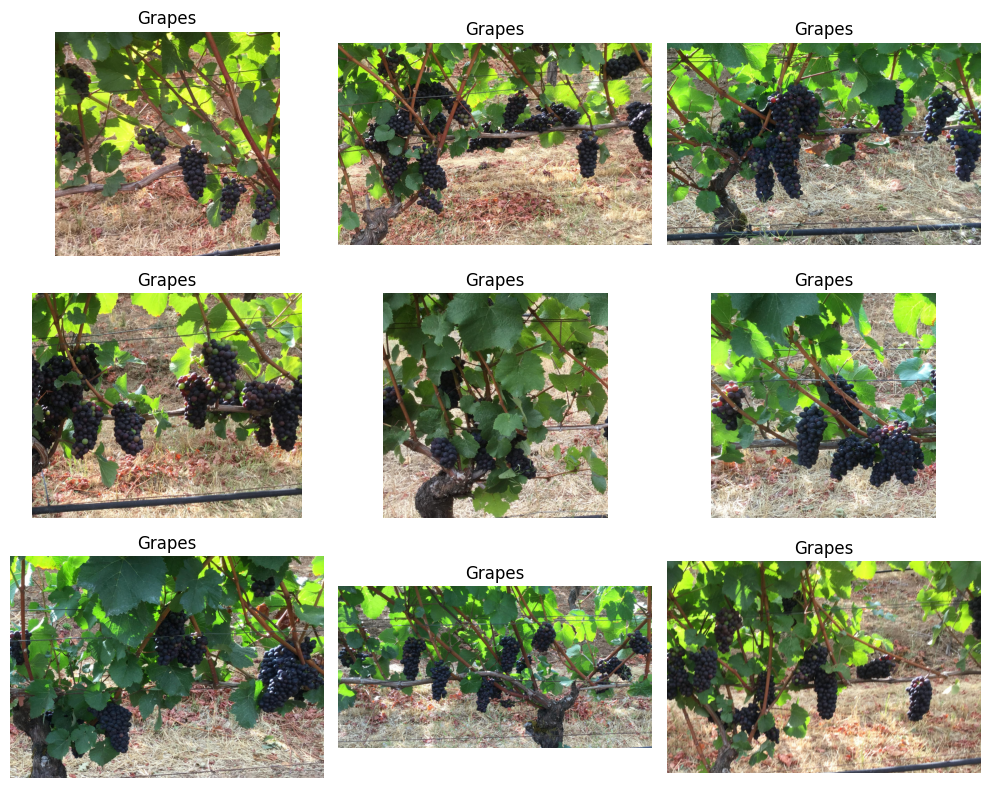

In [ ]:
plt.figure(figsize=(10,8))

for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(val_dir, val[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Grapes")
plt.tight_layout()

In [ ]:
# Load YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(
    data="/content/data.yaml",
    epochs=100,
    imgsz=640,
    batch=4,
    device=0,
    half=True                      # Use mixed precision (half-precision, float16)
)


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 97.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Grapes/Grapes/PinotNoir/train/labels... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<00:00, 1993.15it/s]

train: New cache created: /content/Grapes/Grapes/PinotNoir/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Grapes/Grapes/PinotNoir/val/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 1130.84it/s]

val: New cache created: /content/Grapes/Grapes/PinotNoir/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.751G      1.821      3.207      1.687         78        640: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all          9        101     0.0322      0.861     0.0784     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.736G      1.616      2.634      1.398         68        640: 100%|██████████| 19/19 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all          9        101     0.0352      0.941      0.572      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.713G      1.601      2.125      1.366         49        640: 100%|██████████| 19/19 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all          9        101      0.769      0.446      0.588      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.707G      1.606      1.855      1.372         37        640: 100%|██████████| 19/19 [00:03<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all          9        101      0.633      0.535      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.713G      1.676       1.74      1.417         51        640: 100%|██████████| 19/19 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.83it/s]

                   all          9        101      0.723      0.644      0.692       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.732G      1.606      1.629      1.365         54        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]

                   all          9        101      0.686      0.505      0.592       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.713G      1.609      1.719      1.399         64        640: 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.60it/s]


                   all          9        101      0.625      0.614      0.594      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.734G      1.562      1.671      1.392         81        640: 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          9        101       0.72      0.554      0.621      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.732G      1.536      1.671      1.386         71        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]

                   all          9        101       0.65      0.682      0.672       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.724G      1.525      1.587      1.385         72        640: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all          9        101      0.661      0.676      0.696       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.744G       1.44      1.515      1.337         79        640: 100%|██████████| 19/19 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all          9        101      0.656      0.733      0.735      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.715G      1.412      1.471      1.297         73        640: 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all          9        101      0.772      0.683      0.774      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.715G      1.432      1.515      1.327         56        640: 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]


                   all          9        101      0.739      0.743      0.791      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.711G      1.381      1.425      1.296         45        640: 100%|██████████| 19/19 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]


                   all          9        101      0.819      0.716      0.806      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.715G      1.326       1.44      1.289         90        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]


                   all          9        101      0.821      0.683      0.776      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.724G      1.357      1.387      1.266         67        640: 100%|██████████| 19/19 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all          9        101       0.79      0.709      0.767      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.711G      1.347      1.421      1.284         52        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]


                   all          9        101      0.774      0.714       0.81      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.707G      1.289      1.393      1.252         48        640: 100%|██████████| 19/19 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all          9        101       0.83      0.663      0.812      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.705G       1.34      1.394      1.309         47        640: 100%|██████████| 19/19 [00:03<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]

                   all          9        101       0.78      0.772      0.831      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.742G      1.356      1.354      1.274        101        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all          9        101      0.871      0.738      0.828      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.715G      1.282      1.294      1.241         57        640: 100%|██████████| 19/19 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.65it/s]

                   all          9        101      0.863      0.748      0.845      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.719G      1.298      1.334      1.261         91        640: 100%|██████████| 19/19 [00:02<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.64it/s]

                   all          9        101      0.894      0.762       0.83      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.713G      1.291      1.252      1.237         83        640: 100%|██████████| 19/19 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]

                   all          9        101      0.874      0.752      0.846      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.724G      1.321      1.239      1.262         58        640: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all          9        101      0.837      0.743      0.813      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.707G      1.238      1.252      1.232         99        640: 100%|██████████| 19/19 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]

                   all          9        101       0.85      0.743       0.82      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.709G      1.281      1.237      1.241         99        640: 100%|██████████| 19/19 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all          9        101      0.841      0.752      0.841       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.717G      1.271       1.22      1.207         59        640: 100%|██████████| 19/19 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]


                   all          9        101      0.668      0.713      0.742      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.713G      1.231      1.167      1.193         63        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all          9        101      0.777      0.703      0.812      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.709G      1.204      1.164      1.197         61        640: 100%|██████████| 19/19 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.27it/s]

                   all          9        101      0.916      0.733      0.839      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.713G      1.157      1.143      1.192         71        640: 100%|██████████| 19/19 [00:02<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all          9        101      0.921      0.723      0.856      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.713G      1.206      1.184      1.207         47        640: 100%|██████████| 19/19 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.72it/s]


                   all          9        101      0.854      0.754      0.829       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.717G      1.165      1.172      1.198         49        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all          9        101      0.847      0.733      0.788      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.707G      1.215      1.197      1.223         72        640: 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.67it/s]

                   all          9        101      0.871      0.693      0.744      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.707G      1.166      1.107      1.201         65        640: 100%|██████████| 19/19 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]


                   all          9        101       0.87      0.723      0.831      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.707G       1.17      1.097      1.182         27        640: 100%|██████████| 19/19 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all          9        101      0.883      0.747      0.851      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.715G      1.183      1.111      1.187         61        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]


                   all          9        101      0.869      0.733      0.805      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.709G      1.114      1.023      1.139         39        640: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all          9        101      0.859      0.743        0.8      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.713G      1.147      1.077      1.184         62        640: 100%|██████████| 19/19 [00:02<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all          9        101       0.89      0.733      0.834      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.732G      1.184      1.091      1.189         65        640: 100%|██████████| 19/19 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all          9        101      0.859      0.762      0.884      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.709G      1.197      1.075      1.193         52        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all          9        101      0.852        0.8      0.852       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.709G      1.205      1.115      1.195         61        640: 100%|██████████| 19/19 [00:02<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all          9        101      0.903      0.782      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.715G      1.172      1.052      1.182         60        640: 100%|██████████| 19/19 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all          9        101      0.818      0.803      0.869      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.711G      1.121      1.074      1.177         51        640: 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          9        101      0.833      0.713      0.834      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.728G      1.116      1.023      1.161         90        640: 100%|██████████| 19/19 [00:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          9        101      0.868      0.752      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.719G      1.151      1.044      1.166         76        640: 100%|██████████| 19/19 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all          9        101      0.905      0.756      0.883       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.74G      1.125      1.108      1.175         74        640: 100%|██████████| 19/19 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.66it/s]

                   all          9        101      0.922      0.699      0.868      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.721G      1.119      1.027      1.143         73        640: 100%|██████████| 19/19 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          9        101      0.933      0.703      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.713G      1.103     0.9863      1.162         44        640: 100%|██████████| 19/19 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all          9        101      0.859      0.772      0.887      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      0.74G      1.102     0.9987      1.165         78        640: 100%|██████████| 19/19 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]

                   all          9        101      0.833      0.739       0.87      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.713G      1.075      1.008      1.119         83        640: 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.77it/s]


                   all          9        101      0.727      0.766      0.826      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.713G      1.041     0.9468       1.11         52        640: 100%|██████████| 19/19 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all          9        101      0.838      0.723      0.865      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.719G      1.077     0.9618      1.129         80        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          9        101      0.822      0.772       0.86      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.713G      1.054     0.9538      1.155         73        640: 100%|██████████| 19/19 [00:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

                   all          9        101      0.888      0.752      0.862      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.707G      1.048     0.9595       1.12         70        640: 100%|██████████| 19/19 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]

                   all          9        101      0.899      0.772      0.866       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.742G      1.091     0.9886      1.156         82        640: 100%|██████████| 19/19 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]


                   all          9        101      0.895      0.762       0.87       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.738G      1.061     0.9299      1.124         96        640: 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all          9        101      0.865      0.782      0.853      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.715G      1.038      0.912      1.121         46        640: 100%|██████████| 19/19 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all          9        101      0.819      0.802      0.872      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.734G      1.081     0.9159      1.112         64        640: 100%|██████████| 19/19 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all          9        101      0.919      0.784      0.884      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.713G      1.059     0.9127      1.111         72        640: 100%|██████████| 19/19 [00:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          9        101      0.938      0.744      0.878      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.709G      1.039      0.905      1.123         60        640: 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all          9        101      0.916      0.751      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.715G      1.034     0.8913      1.101         83        640: 100%|██████████| 19/19 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          9        101      0.794      0.812      0.866        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.736G      1.037     0.9139      1.085         38        640: 100%|██████████| 19/19 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.46it/s]

                   all          9        101      0.803      0.802      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.709G      1.045     0.8909      1.107         52        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.62it/s]

                   all          9        101      0.812      0.813      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.707G     0.9995      0.873      1.087         45        640: 100%|██████████| 19/19 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all          9        101      0.871        0.8      0.899      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.711G      1.036     0.8762      1.111         48        640: 100%|██████████| 19/19 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]

                   all          9        101      0.849      0.802      0.894      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.705G          1     0.8537      1.078         42        640: 100%|██████████| 19/19 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.32it/s]

                   all          9        101      0.833      0.772       0.88      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.709G     0.9966     0.8462      1.087         57        640: 100%|██████████| 19/19 [00:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.94it/s]

                   all          9        101      0.841      0.785      0.889      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.732G      1.031     0.8815      1.104         50        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all          9        101      0.888      0.785      0.885       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      0.73G      1.001     0.8465      1.086         52        640: 100%|██████████| 19/19 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.97it/s]

                   all          9        101      0.911      0.782      0.895      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.707G      0.978     0.8342      1.064         33        640: 100%|██████████| 19/19 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.77it/s]

                   all          9        101      0.851      0.846      0.894      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.717G     0.9884     0.8389      1.102         78        640: 100%|██████████| 19/19 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all          9        101      0.862      0.832       0.89      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      0.73G      1.025     0.8375      1.083         72        640: 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]


                   all          9        101      0.896      0.772      0.909      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.711G     0.9888     0.8162      1.068         65        640: 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]


                   all          9        101      0.926      0.782      0.905      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.713G      0.993       0.84      1.088         60        640: 100%|██████████| 19/19 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]

                   all          9        101      0.916      0.832      0.921      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.738G     0.9514      0.813      1.067         72        640: 100%|██████████| 19/19 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          9        101      0.904      0.832      0.912      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.736G     0.9535     0.8015      1.065         57        640: 100%|██████████| 19/19 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all          9        101      0.861      0.842      0.908      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.736G      0.945     0.7864      1.053         27        640: 100%|██████████| 19/19 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.39it/s]

                   all          9        101      0.931      0.782      0.909       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.717G     0.9509     0.7874       1.07         31        640: 100%|██████████| 19/19 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.72it/s]

                   all          9        101      0.855      0.817      0.897      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.717G      0.962     0.7919      1.052         67        640: 100%|██████████| 19/19 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all          9        101       0.87      0.797      0.893      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.736G     0.9304     0.7699      1.046         62        640: 100%|██████████| 19/19 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all          9        101      0.853      0.803      0.896      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.713G      0.938     0.7659      1.039         50        640: 100%|██████████| 19/19 [00:02<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all          9        101      0.885      0.792      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.711G     0.9911     0.8094      1.095         83        640: 100%|██████████| 19/19 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.10it/s]

                   all          9        101      0.888      0.782      0.894      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.726G     0.9326     0.7876      1.076         40        640: 100%|██████████| 19/19 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.04it/s]

                   all          9        101      0.939      0.761      0.885      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.703G     0.9096     0.7693      1.048         83        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all          9        101      0.872      0.807      0.888       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.713G     0.9393      0.751      1.059         33        640: 100%|██████████| 19/19 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all          9        101      0.894      0.782      0.887       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.694G     0.9095     0.7346      1.056         52        640: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]

                   all          9        101      0.878      0.792      0.894      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.715G     0.8973     0.7422      1.048         43        640: 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]


                   all          9        101      0.888      0.792      0.897      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.709G     0.9216      0.747      1.049         54        640: 100%|██████████| 19/19 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          9        101      0.942      0.772      0.912      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.709G     0.8883     0.7261      1.036         82        640: 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]


                   all          9        101      0.956      0.772      0.916      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.709G     0.9209      0.742      1.047         67        640: 100%|██████████| 19/19 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.34it/s]

                   all          9        101      0.975      0.771       0.92      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.682G     0.8775     0.8084      1.031         34        640: 100%|██████████| 19/19 [00:03<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all          9        101      0.963      0.772      0.918      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.682G     0.8492      0.758      1.003         38        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]


                   all          9        101      0.951      0.782      0.917      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.682G     0.8163     0.7329     0.9951         40        640: 100%|██████████| 19/19 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]

                   all          9        101      0.953      0.772      0.917      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.682G     0.8454     0.7302      1.002         32        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]


                   all          9        101      0.929       0.78      0.919      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       0.7G     0.8654     0.7527      1.052         21        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all          9        101      0.831      0.875      0.921      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.675G     0.8238     0.6829      0.993         45        640: 100%|██████████| 19/19 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          9        101      0.826      0.846      0.912      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.682G     0.8309     0.7171     0.9904         24        640: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all          9        101      0.835      0.842      0.907      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.677G      0.823     0.6931     0.9938         28        640: 100%|██████████| 19/19 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all          9        101      0.833      0.842      0.906      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.694G     0.8494     0.7204      0.998         44        640: 100%|██████████| 19/19 [00:02<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]


                   all          9        101      0.842      0.832      0.908      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.682G     0.8179     0.6991     0.9875         55        640: 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all          9        101      0.836      0.851      0.914      0.639



100 epochs completed in 0.116 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]


                   all          9        101      0.904      0.832      0.912      0.661
Speed: 0.4ms preprocess, 6.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0241_0.jpg: 640x640 14 grapes, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


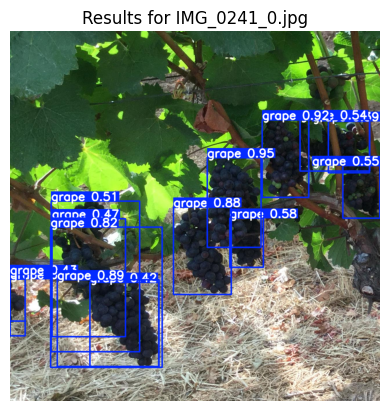


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0235_0.jpg: 640x640 10 grapes, 13.4ms
Speed: 4.4ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


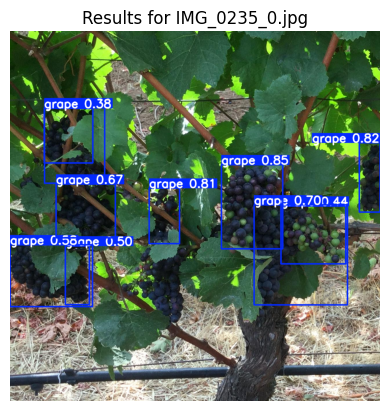


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0240_0.jpg: 640x640 8 grapes, 15.9ms
Speed: 3.5ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


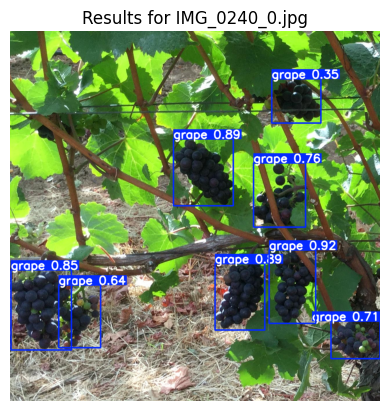


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0211_0.jpg: 640x640 8 grapes, 13.0ms
Speed: 3.2ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


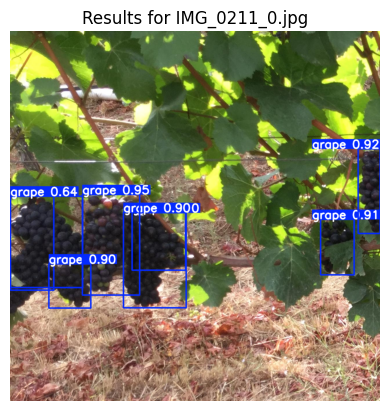


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0230_1.jpg: 480x640 14 grapes, 107.4ms
Speed: 4.0ms preprocess, 107.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


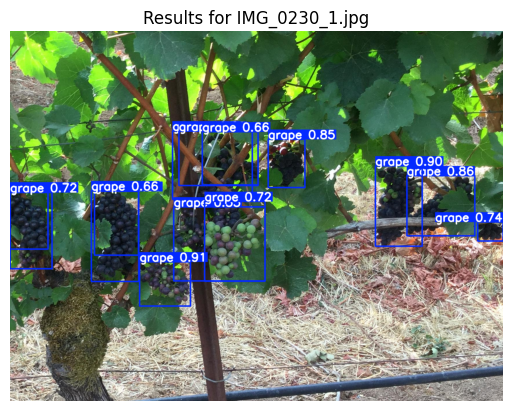


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0243_1.jpg: 448x640 11 grapes, 118.0ms
Speed: 3.5ms preprocess, 118.0ms inference, 5.7ms postprocess per image at shape (1, 3, 448, 640)


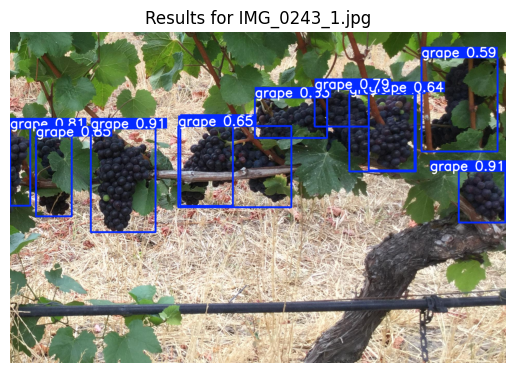


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0237_1.jpg: 512x640 9 grapes, 147.0ms
Speed: 3.9ms preprocess, 147.0ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 640)


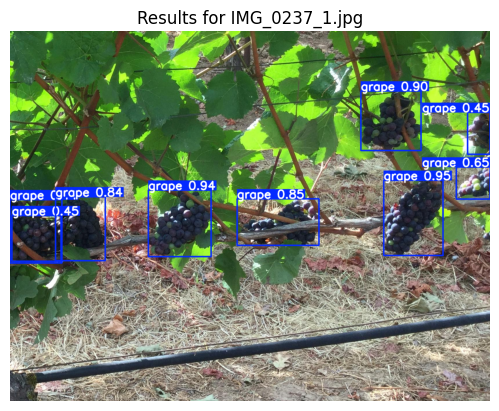


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0203_0.jpg: 640x640 8 grapes, 14.7ms
Speed: 3.1ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


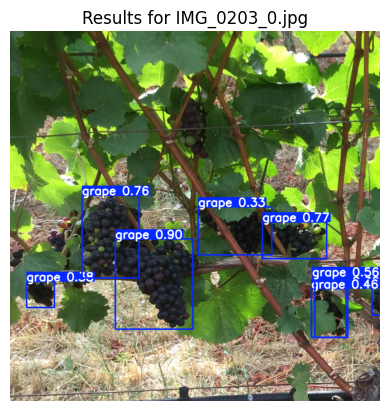


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0209_0.jpg: 640x640 8 grapes, 14.0ms
Speed: 4.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


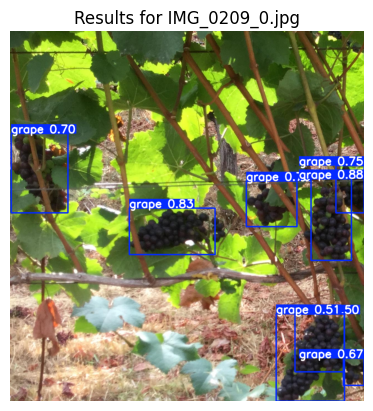


image 1/1 /content/Grapes/Grapes/PinotNoir/test/images/IMG_0238_1.jpg: 448x640 10 grapes, 13.8ms
Speed: 3.6ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


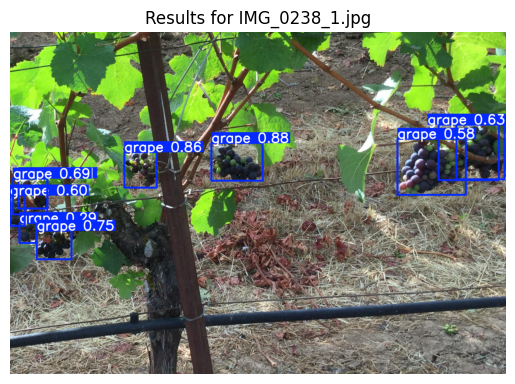

In [ ]:
#test the data

for img_file in os.listdir(test_dir):
    if img_file.endswith(('.jpg', '.png')):
        image_path = os.path.join(test_dir, img_file)
        results = model(image_path, conf = 0.25)

        img = results[0].plot()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Results for {img_file}')
        plt.axis('off')
        plt.show()

In [ ]:
# Validate the model on a test or validation set and calculate mAP
results = model.val(data="/content/data.yaml", imgsz=640)

# Print the mAP@0.5
print(f"mAP@0.5: {results.box.map50}")

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Grapes/Grapes/PinotNoir/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all          9        101      0.903      0.832      0.923      0.668
Speed: 1.5ms preprocess, 61.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train22
mAP@0.5: 0.9226000523971071


In [ ]:
video_path = '/content/Grapes/Grapes/videos'
results = model(video_path, save=True)

predicted_video_path = os.path.join(results[0].save_dir, 'predict_video.mp4') # Get the saved video path


# Display the video
display(Video(predicted_video_path, embed=True, width=640, height=480))



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/2 (frame 1/433) /content/Grapes/Grapes/videos/grape_track_count.avi: 384x640 (no detections), 77.4ms
video 1/2 (frame 2/433) /content/Grapes/Grapes/videos/grape_track_count.avi: 384x640 (no detections), 10.2ms
video 1/2 (frame 3/433) /content/Grapes/Grapes/videos/grape_track_count.avi: 384x640 (no detections), 10.0ms
video 1/2 (frame 4/433) /content/Grapes/Grapes/videos/grape_track_count.avi: 384x640 (no detections), 10.0ms
video 1/2 (frame 5/4

In [ ]:
# Open video capture
cap = cv2.VideoCapture("/content/runs/detect/train23/grape_track_count.avi")

# Start timing and process frames
frame_count = 0
start_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict on frame
    with torch.no_grad():
        results = model.predict(frame, device=0)  # Ensure device is GPU

    # Display frame count and break loop if needed
    frame_count += 1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Calculate FPS
end_time = time.time()
fps = frame_count / (end_time - start_time)
print(f"Average FPS: {fps:.2f}")

cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.2ms
Speed: 3.2ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 3.0ms preprocess, 9.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 2.9ms preprocess, 10.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 